In [14]:
from src.utils import *
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

In [15]:
puzzle_input = parse_puzzle_input(15)

In [16]:
puzzle_input[:3]

['1195699269169962618115739279199143968185692172285182183566221795877116121863721498957174621167918242',
 '9115625874265799911728162199785394821312124845672192542919338584962177612992393151111933224334135452',
 '8131729216517615863391649615129757111193739768481218915512112595941796747611211317938536136799846916']

In [17]:
sample_input = [
    '1163751742',
    '1381373672',
    '2136511328',
    '3694931569',
    '7463417111',
    '1319128137',
    '1359912421',
    '3125421639',
    '1293138521',
    '2311944581'
]

In [18]:
def generate_coordinate_dict(puzzle_input):
    
    coordinate_dict = {}
    for y, line in enumerate(puzzle_input):
        for x, weight in enumerate(line):
            coordinate_dict[(x, y)] = int(weight)
    return coordinate_dict

In [19]:
sample_coordinate_dict = generate_coordinate_dict(sample_input)

In [20]:
def find_neighbours(coordinate, coordinate_dict):
    
    x, y = coordinate
    all_neighbours = [
        (x + 1, y),
        (x - 1, y),
        (x, y + 1),
        (x, y - 1)
    ]
    
    return [neighbour for neighbour in all_neighbours if neighbour in coordinate_dict]

In [29]:
def generate_graph_network(coordinate_dict):
    
    graph = nx.DiGraph()
    
    for coordinate in coordinate_dict:
        for neighbour in find_neighbours(coordinate, coordinate_dict):
            
            graph.add_edge(coordinate, neighbour, risk = coordinate_dict[neighbour])
            
    return graph

In [22]:
def find_top_left_bottom_right(coordinate_dict):
    x_all = [i[0] for i in list(coordinate_dict.keys())]
    y_all = [i[1] for i in list(coordinate_dict.keys())]
    
    return (min(x_all), min(y_all)), (max(x_all), max(y_all))

In [74]:
def show_solution(path_coordinates, coordinate_dict):
    
    _, max_coordinates = find_top_left_bottom_right(coordinate_dict)
    
    max_x, max_y = max_coordinates
    
    fig, ax = plt.subplots()

    for x in range(max_x + 1):
        for y in range(max_y + 1):
            c = coordinate_dict[(x, max_y - y)]
            
            backgroundcolor = 'white'
            if (x, max_y - y) in path_coordinates:
                backgroundcolor = 'lawngreen'
            
            ax.text(x+0.5, y+0.5, str(c), va='center', ha='center', backgroundcolor = backgroundcolor)

    ax.set_xlim(0, max_x + 1)
    ax.set_ylim(0, max_y + 1)
    ax.set_xticks(np.arange(max_x+1))
    ax.set_yticks(np.arange(max_y+1))
    ax.set_yticklabels(np.arange(max_y+1)[::-1])
    ax.grid()

In [24]:
def part_1_answer(puzzle_input):
    
    coordinate_dict = generate_coordinate_dict(puzzle_input)
    
    graph = generate_graph_network(coordinate_dict)
    
    top_left, bottom_right = find_top_left_bottom_right(coordinate_dict)
    
    path = nx.shortest_path(graph, top_left, bottom_right, weight = 'risk')
    
    show_solution(path, coordinate_dict)
    
    return sum([coordinate_dict[step] for step in path if step is not top_left])

40

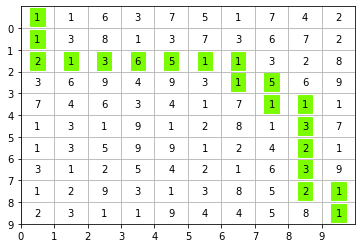

In [30]:
part_1_answer(sample_input)

423

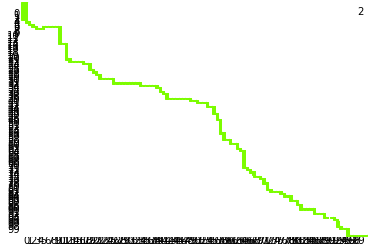

In [31]:
part_1_answer(puzzle_input)

## Part 2

In [66]:
def find_new_risk(old_risk, multiplier_value):
    
    num_list = [i for i in range(1,10)]
    
    new_risk = old_risk
    
    for _ in range(multiplier_value):
        new_risk = num_list[new_risk % 9]
        
    return new_risk
    

In [107]:
def generate_large_map(coordinate_dict, multiplier=5):
    
    large_coordinate_dict = coordinate_dict.copy()
    
    _, max_coordinates = find_top_left_bottom_right(coordinate_dict)
    
    max_x, max_y = max_coordinates
    
    multiplier_dict = {}
    for x in range(multiplier+1):
        for y in range(multiplier+1):
            multiplier_dict[(x, y)] = x + y
    
    for multiplier in multiplier_dict:
        
        if multiplier is not (0, 0):
            x_add = multiplier[0] * (max_x + 1)
            y_add = multiplier[1] * (max_y + 1)
        
            for coordinate in coordinate_dict:
                              
                x, y = coordinate
                
                large_coordinate_dict[(x + x_add, y + y_add)] = find_new_risk(coordinate_dict[coordinate], multiplier_dict[multiplier])

    return large_coordinate_dict

In [113]:
def part_2_answer(puzzle_input):
    
    coordinate_dict = generate_coordinate_dict(puzzle_input)
    
    large_coordinate_dict = generate_large_map(coordinate_dict, multiplier=4)
    
    graph = generate_graph_network(large_coordinate_dict)
    
    top_left, bottom_right = find_top_left_bottom_right(large_coordinate_dict)
    
    path = nx.shortest_path(graph, top_left, bottom_right, weight = 'risk')
    
    return sum([large_coordinate_dict[step] for step in path if step is not top_left])

In [115]:
part_2_answer(sample_input)

315

In [116]:
part_2_answer(puzzle_input)

2778